Epoch 1/10
1/1 [==============================] - 1s 577ms/step - loss: 0.7341
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 0.7210
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 0.7081
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 0.6954
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 0.6830
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 0.6709
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 0.6590
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 0.6474
Epoch 9/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6361
Epoch 10/10
1/1 [==============================] - 0s 20ms/step
Accuracy: 0.875
Precision: 1.0
Recall: 0.8333333333333334
F1 Score: 0.9090909090909091
ROC AUC Score: 0.9166666666666667


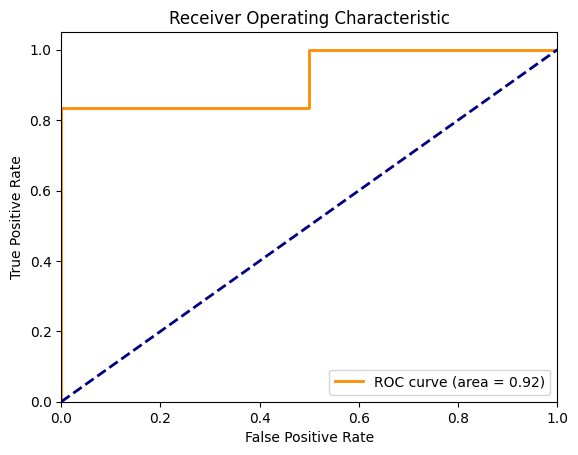

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset (use the provided dataset)
data = pd.read_csv("/content/preprocessed_data.csv")

# Data preprocessing (assuming you've already performed preprocessing)
# Convert categorical columns to numerical using Label Encoding
label_encoders = {}
categorical_columns = ["Weather", "Event", "Road_Type"]

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into features (X) and target (y)
X = data.drop(columns=["Traffic_Jam"])
y = data["Traffic_Jam"]

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have a trained model (e.g., a neural network) named 'model' here


# Define and compile a simple neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
